# Tools for working with Arcadia's plotting styles

Arcadia has a set of visual communication standards for figures. `arcadia-pycolor` provides utilities for automatically styling figures in Python with these standards.

## 0. Example without `arcadia-pycolor`
Using plotting tools like `seaborn`, you can create plots with their default styles. These styles don't conform to Arcadia's style standards.

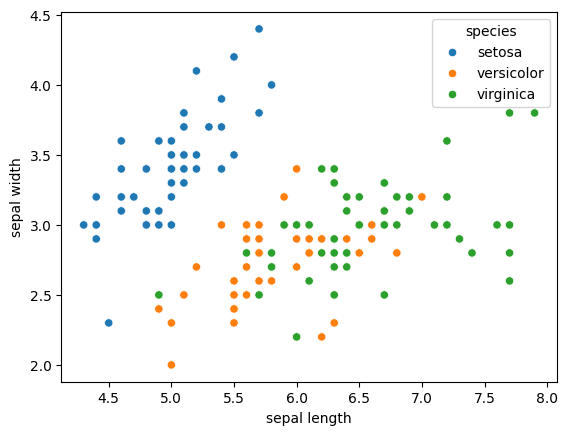

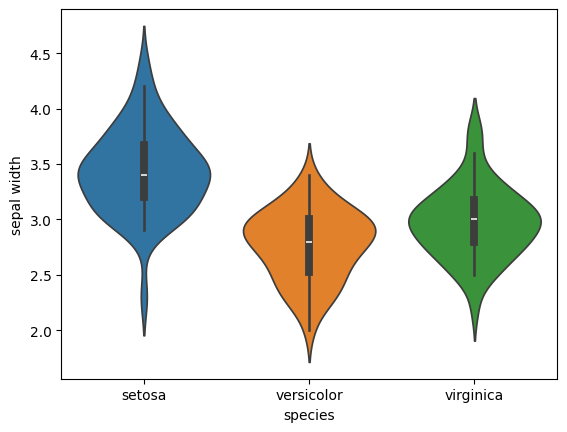

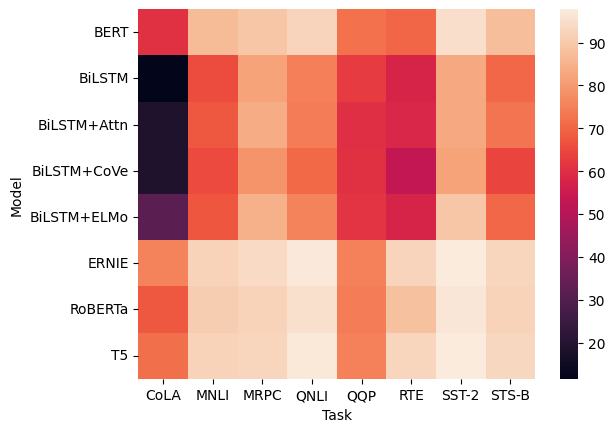

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

# prepare dataset
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data)
iris_data.columns = [i.replace(" (cm)", "") for i in iris.feature_names]
iris_data["species"] = iris.target_names[iris.target]
iris_data.head(5)

# plot
x_data = "sepal length"
y_data = "sepal width"
c_data = "species"

sns.scatterplot(x=x_data, y=y_data, hue="species", data=iris_data)
plt.show()

sns.violinplot(x=c_data, y=y_data, data=iris_data, hue=c_data)
plt.show()

glue = sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")
sns.heatmap(glue)
plt.show()

## 1. Using `apc.mpl.setup()` to apply Arcadia's styles
Using `arcadia_pycolor`'s `apc.mpl.setup()` function, you can update `matplotlib`'s default style settings to conform to Arcadia's standards. If you have Suisse family fonts installed, `apc.mpl.setup()` will use them.

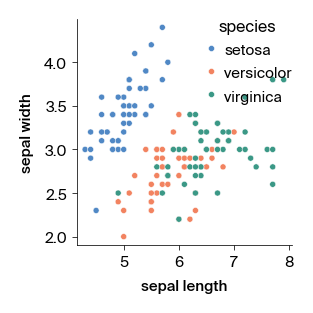

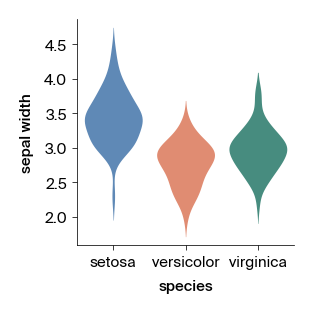

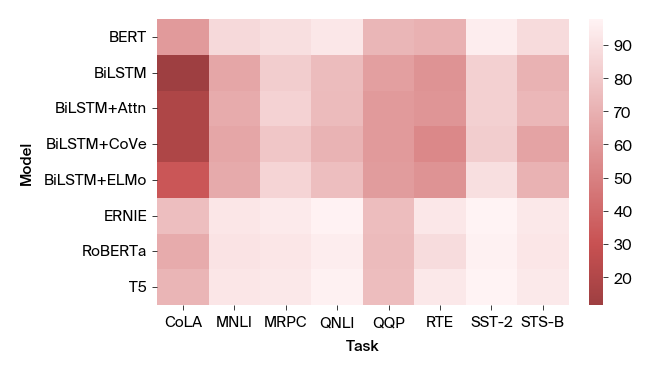

In [6]:
import arcadia_pycolor as apc

apc.mpl.setup()

colors = {
    "setosa": "apc:aegean",
    "versicolor": apc.amber,
    "virginica": apc.seaweed,
}

fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("float_square"), layout="constrained")
sns.scatterplot(
    x=x_data,
    y=y_data,
    hue=c_data,
    data=iris_data,
    palette=colors,
    ax=ax,
)
apc.mpl.save_figure(fname="examples/scatter_setup.pdf")
plt.show()

fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("float_square"), layout="constrained")
sns.violinplot(
    x=c_data,
    y=y_data,
    data=iris_data,
    hue=c_data,
    palette=colors,
    ax=ax,
)
apc.mpl.save_figure(fname="examples/violin_setup.pdf")
plt.show()

fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("float_wide"), layout="constrained")
sns.heatmap(glue, ax=ax, cmap="apc:reds")
apc.mpl.save_figure(fname="examples/heatmap_setup.pdf")
plt.show()

## 2. Polishing plots with `apc.mpl.style_axis()`

`apc.mpl.style_axis()` can be used to polish plots further to conform to Arcadia's standards. You can call this function after creating a plot to apply the following changes:
- Automatically capitalize legend and axis titles
- Add a horizontal line between legend title and entries
- When using the `monospaced_axes` argument; converts axis labels to monospaced font
- When using the `categorical_axes` argument; capitalizes text, removes tickmarks, and adjusts padding
- When using the `colorbar_exists` argument; converts axis labels to monospaced font

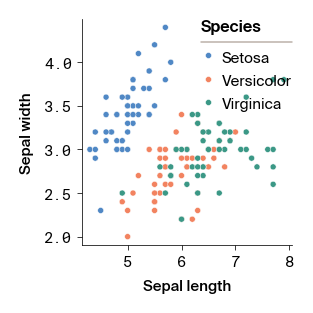

/Users/dennis/Code/arcadia-pycolor/arcadia_pycolor/mpl.py:116: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)  # type: ignore


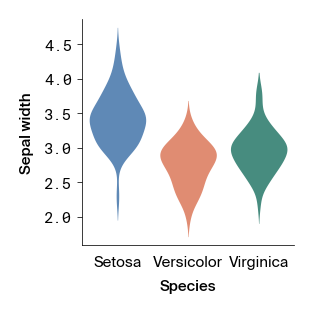

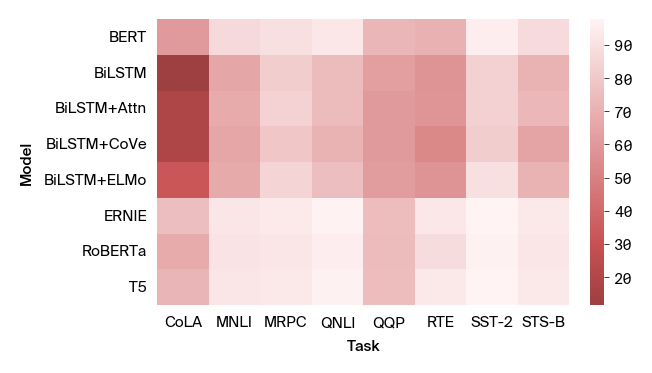

In [9]:
fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("float_square"), layout="constrained")
sns.scatterplot(
    x=x_data,
    y=y_data,
    hue="species",
    data=iris_data,
    palette=colors,
    ax=ax,
)
apc.mpl.style_axis(monospaced_axes="both")

apc.mpl.save_figure(fname="examples/scatter_style_axis.pdf")

plt.show()

fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("float_square"), layout="constrained")
sns.violinplot(
    x=c_data,
    y=y_data,
    data=iris_data,
    hue=c_data,
    palette=colors,
    ax=ax,
)
apc.mpl.style_axis(categorical_axes="x", monospaced_axes="y")
apc.mpl.save_figure(fname="examples/violin_style_axis.pdf")

plt.show()


fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("float_wide"), layout="constrained")
sns.heatmap(glue, ax=ax, cmap="apc:reds")
apc.mpl.style_axis(colorbar_exists=True)
# Didn't use categorical_axes = "both" because it alters the ALLCAPS axis labels.

apc.mpl.set_xaxis_categorical()
apc.mpl.set_yaxis_categorical()

apc.mpl.save_figure(fname="examples/heatmap_style_axis.pdf")
plt.show()

## 3. Default figure sizes using `apc.mpl.get_figure_dimensions()`

The `apc.mpl.get_figure_dimensions()` function allows you to choose from a fixed set of plot sizes, which are compatible with our Adobe Creative Cloud templates.

When generated with `layout="constrained"` and saved using `apc.mpl.save_figure()`, the resulting PDF images should drag and drop neatly into place with the Illustrator templates.

There are three size categories, based on the Creative Cloud templates:
- `"full"` (1000px wide)
- `"float"` (700px wide)
- `"half"` (500px wide)

Each size category has a few options for aspect ratio:
- `"wide"`: wider on the horizontal axis, for `"full"` and `"float"` sizes
- `"square"`: equal width and height, for all sizes

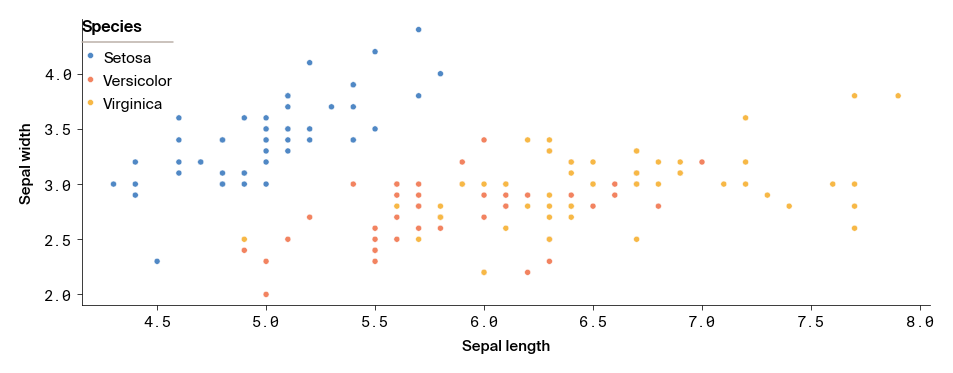

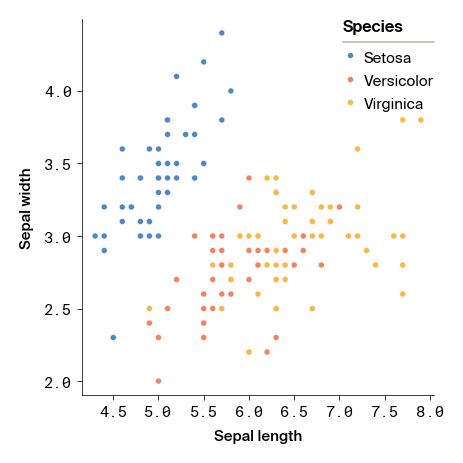

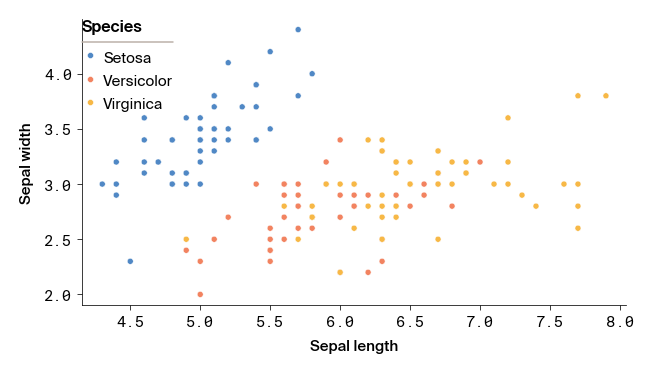

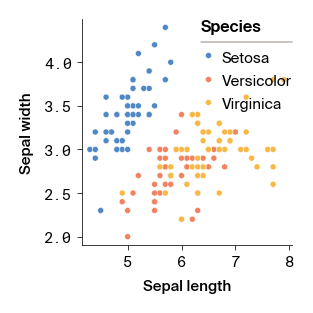

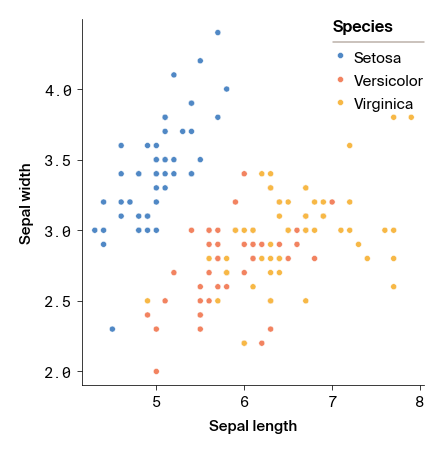

In [10]:
fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("full_wide"), layout="constrained")
sns.scatterplot(x=x_data, y=y_data, hue="species", data=iris_data, ax=ax)
apc.mpl.style_axis(monospaced_axes="both")
apc.mpl.save_figure(fname="examples/scatter_full_wide.pdf")  # type: ignore
plt.show()

fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("full_square"), layout="constrained")
sns.scatterplot(x=x_data, y=y_data, hue="species", data=iris_data, ax=ax)
apc.mpl.style_axis(monospaced_axes="both")
apc.mpl.save_figure(fname="examples/scatter_full_square.pdf")  # type: ignore
plt.show()

fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("float_wide"), layout="constrained")
sns.scatterplot(x=x_data, y=y_data, hue="species", data=iris_data, ax=ax)
apc.mpl.style_axis(monospaced_axes="both")
apc.mpl.save_figure(fname="examples/scatter_float_wide.pdf")  # type: ignore
plt.show()

fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("float_square"), layout="constrained")
sns.scatterplot(x=x_data, y=y_data, hue="species", data=iris_data, ax=ax)
apc.mpl.style_axis(monospaced_axes="both")
apc.mpl.save_figure(fname="examples/scatter_float_square.pdf")  # type: ignore
plt.show()

fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("half_square"), layout="constrained")
sns.scatterplot(x=x_data, y=y_data, hue="species", data=iris_data, ax=ax)
apc.mpl.style_axis(monospaced_axes="both")
apc.mpl.save_figure(fname="examples/scatter_half_square.pdf")  # type: ignore
plt.show()

## 4. Simulating colored backgrounds

The default Creative Cloud templates use an `apc.parchment` background color. You can simulate this background color in your plots by modifying `matplotlib`'s rcParams within a `with` statement. When saved using `apc.mpl.save_figure()`, PDF files default to using a transparent background.

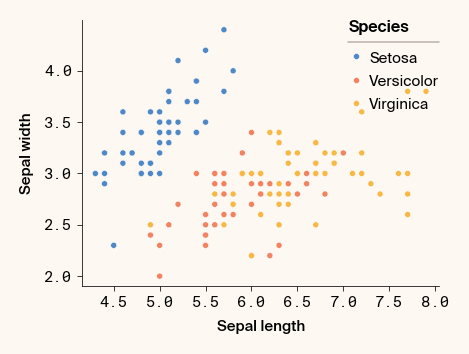

In [13]:
import matplotlib as mpl

with mpl.rc_context({"figure.facecolor": apc.parchment}):
    sns.scatterplot(x=x_data, y=y_data, hue="species", data=iris_data)
    apc.mpl.style_axis(monospaced_axes="both")
    plt.show()